### Objective: Make an exploratory data analysis of the provided dataset: how many classes, how many examples per class, word distribution (e.g. TF-IDF), etc. You should document your analysis with proper visualizations.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_json('./data/data.jsonl', lines=True)


data.head()

C:\Users\fabio\AppData\Local\Temp\ipykernel_17820\4079697510.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2


In [3]:
emotions_to_int = {
    'anger': 0,
    'fear': 1,
    'joy': 2,
    'love': 3,
    'sadness': 4,
    'surprise': 5
}

int_to_emotions = {v: k for k, v in emotions_to_int.items()}

emotions_count =  data['label'].explode().value_counts()
# replace the int values with the emotions



emotions_count.index = emotions_count.index.map(int_to_emotions)
emotions_count



label
fear        141067
anger       121187
love         57317
sadness      47712
joy          34554
surprise     14972
Name: count, dtype: int64

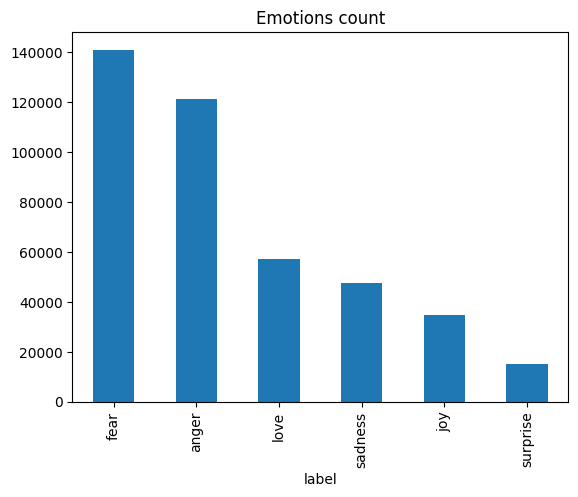

In [10]:
# plot the emotions count
emotions_count.plot(kind='bar', title='Emotions count')
plt.show()

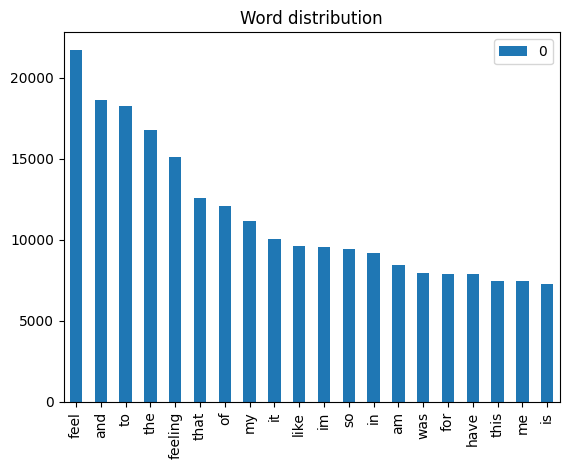

In [11]:
# plot the word distribution
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])
words = vectorizer.get_feature_names_out()
word_distribution = X.sum(axis=0)
word_distribution = pd.DataFrame(word_distribution, columns=words)
word_distribution = word_distribution.T
word_distribution = word_distribution.sort_values(by=0, ascending=False)
word_distribution = word_distribution.head(20)
word_distribution.plot(kind='bar', title='Word distribution')
plt.show()

etc.... foi só mesmo para começar :D
que mais será giro fazer? wordcloud, por emoção, 

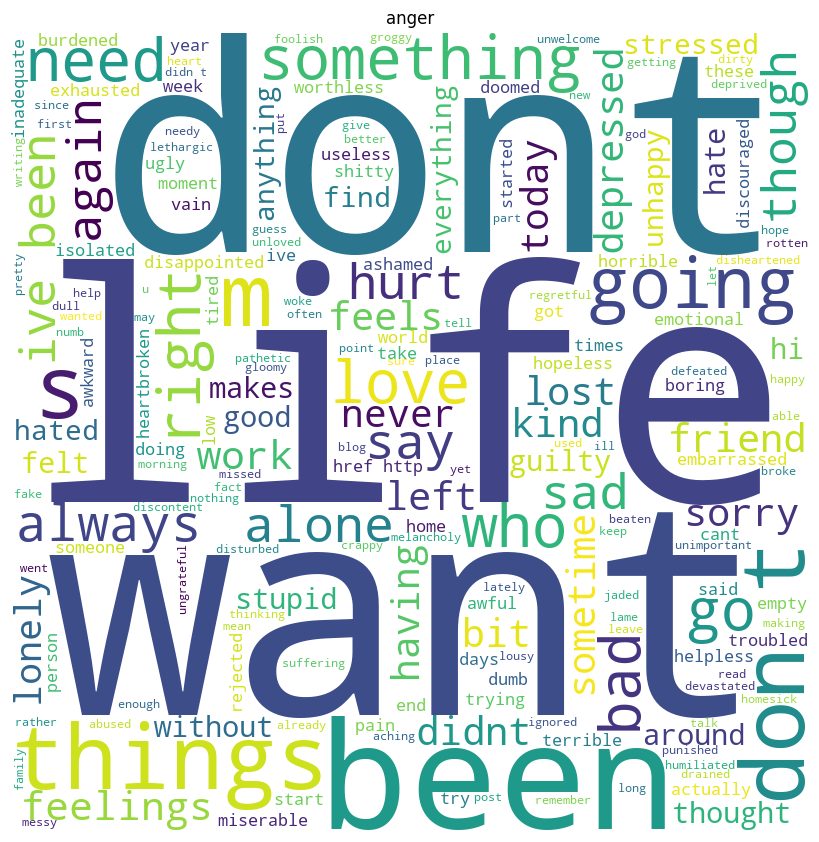

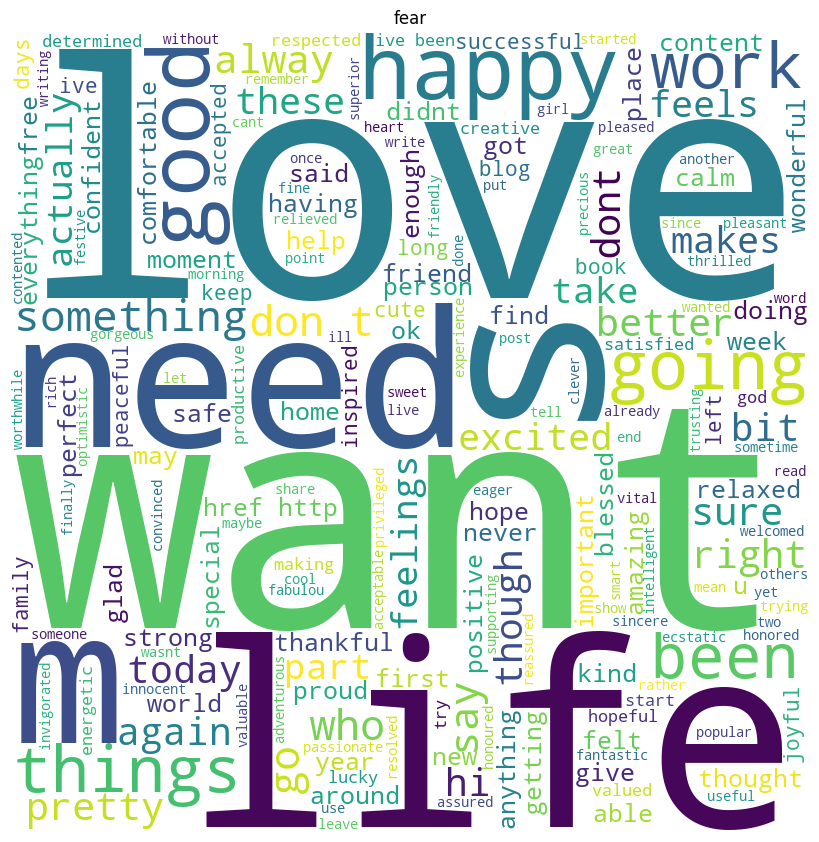

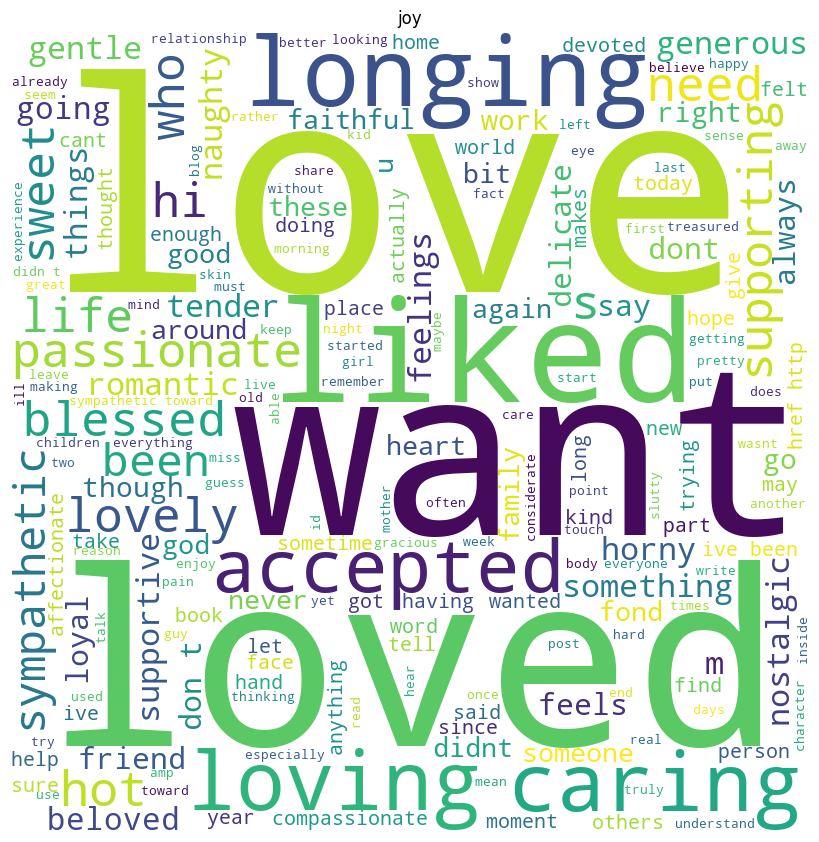

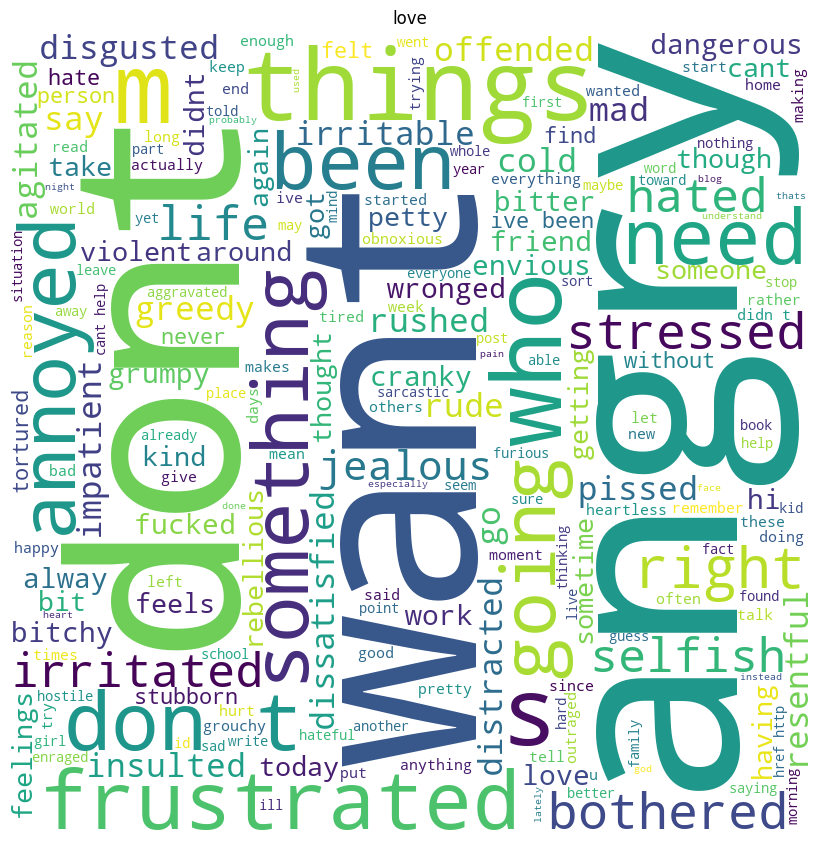

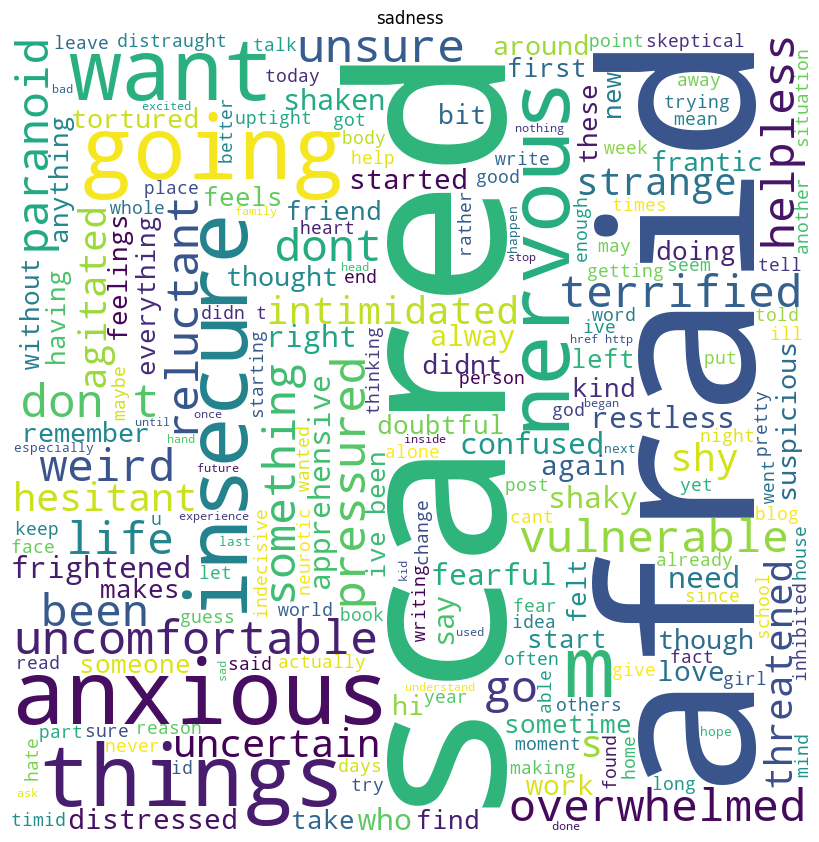

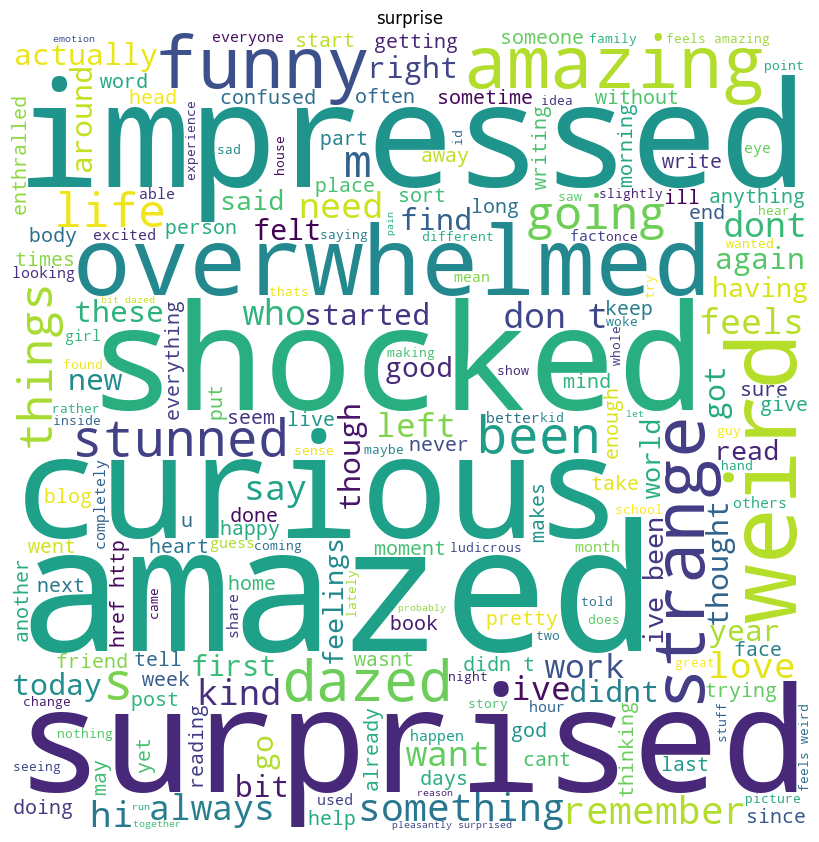

In [6]:

from wordcloud import WordCloud

def generate_wordclouds(data, int_to_emotions):
    for emotion_int, emotion_name in int_to_emotions.items():
        emotion_texts = data[data['label'] == emotion_int]['text']
        
        wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = {'people', 'thing', 'think', 'had', 'day', 'i', 'a', 'im', 'myself', 'he', 'she', 'to', 'of', 'and', 'the', 'in', 'is', 'for', 'it', 'on', 'that', 'with', 'are', 'you', 'be', 'this', 'as', 'at', 'or', 'not', 'have', 'was', 'from', 'by', 'but', 'an', 'they', 'will', 'has', 'my', 'about', 'so', 'all', 'just', 'what', 'like', 'your', 'me', 'more', 'up', 'out', 'if', 'no', 'one', 'get', 'how', 'can', 'we', 'do', 'time', 'when', 'its', 'there', 'would', 'which', 'their', 'some', 'were', 'other', 'then', 'them', 'know', 'only', 'could', 'see', 'him', 'her', 'than', 'now', 'look', 'come', 'did', 'back', 'after', 'our', 'well', 'also', 'even', 'should', 'into', 'over', 'where', 'down', 'most', 'made', 'those', 'because', 'off', 'am', 'too', 'here', 'ever', 'being', 'way', 'make', 'much', 'many', 'still', 'before', 'same', 'might', 'such', 'under', 'every', 'own', 'why', 'between', 'both', 'under', 'against', 'each', 'few', 'through', 'while', 'own', 'same', 'where', 'after', 'before', 'about', 'over', 'under', 'above', 'below', 'more', 'less', 'few', 'many', 'much', 'some', 'any', 'no', 'yes', 'not', 'only', 'so', 'very', 'too', 'just', 'quite', 'really', 'almost', 'nearly', 'well', 'much', 'little', 'more', 'less', 'few', 'lot', 'fewer', 'most', 'least', 'feel', 'feeling'}
                ).generate(' '.join(emotion_texts))
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)
        plt.title(emotion_name)

        plt.show()

generate_wordclouds(data, int_to_emotions)